# Spirals Classification

Classify two spirals generated with the library SyntheticDatasets, using NNJulia.

### Imports

In [1]:
# Import external librairies to generate dataset and plot
using SyntheticDatasets
using Plots

# Import NNJulia
include("../src/NNJulia.jl")
using .NNJulia

### Load dataset

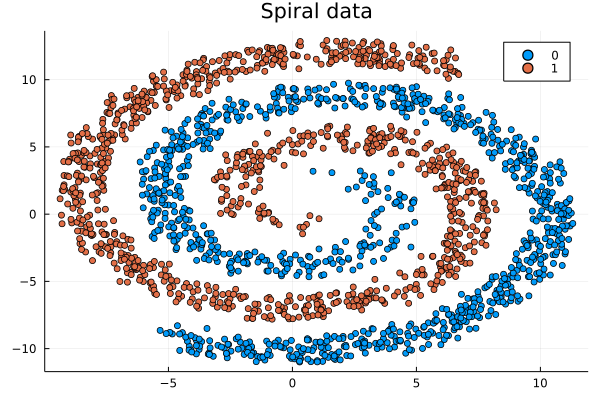

In [2]:
# load dataset
spirals = SyntheticDatasets.make_twospirals(n_samples = 2000, 
                                            start_degrees = 90,
                                            total_degrees = 570, 
                                            noise =1.9);


# plot dataset
scatter(spirals.feature_1,spirals.feature_2,group=spirals.label,title="Spiral data")

In [3]:
# extract inputs and labels from the dataset
xData = permutedims([spirals.feature_1 spirals.feature_2]) # 2x2000
yData = permutedims(spirals.label) #1x2000

# split the dataset into train and test sets
x_train,y_train,x_test,y_test = split_train_test(xData,yData,0.9);

### Create the model 

In [23]:
model = Sequential(
        Dense(2, 16, leakyrelu),
        Dense(16, 16, leakyrelu),
        Dense(16, 1, sigmoid),
    )

Sequential with : 3 layer


Dense: 2 --> 16, Activation = leakyrelu
Dense: 16 --> 16, Activation = leakyrelu
Dense: 16 --> 1, Activation = sigmoid


### Train the model

Initialise the parameters used for the training phase :

In [22]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.1)
loss = BinaryCrossentropy()
metrics = BinaryAccuracy(0.8)

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 100;

Load the train data into a dataloader that will split the data into shuffled batches :

In [24]:
trainData = DataLoader(x_train, y_train, batchsize,true);

Train the model :

In [25]:
history = train!(model, trainParams, trainData, nbEpochs)

Epoch 1 : accuracy = 0.5743534482758621, loss = 30.964165200337035
Epoch 2 : accuracy = 0.546875, loss = 17.904129070269942
Epoch 3 : accuracy = 0.5452586206896551, loss = 17.542059805544717
Epoch 4 : accuracy = 0.5484913793103449, loss = 17.067508708037643
Epoch 5 : accuracy = 0.5581896551724138, loss = 16.640922917324204
Epoch 6 : accuracy = 0.5668103448275862, loss = 16.55183842237686
Epoch 7 : accuracy = 0.5635775862068966, loss = 16.485793912625095
Epoch 8 : accuracy = 0.5862068965517241, loss = 16.28641973796103
Epoch 9 : accuracy = 0.5818965517241379, loss = 16.004383719021266
Epoch 10 : accuracy = 0.5808189655172413, loss = 15.715262599884404
Epoch 11 : accuracy = 0.5910560344827587, loss = 15.623995252688179
Epoch 12 : accuracy = 0.599676724137931, loss = 15.913128704861641
Epoch 13 : accuracy = 0.609375, loss = 15.247496806073412
Epoch 14 : accuracy = 0.5969827586206896, loss = 15.393652442286948
Epoch 15 : accuracy = 0.6104525862068966, loss = 15.065106025759984
Epoch 16 : a

Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.574353, 0.546875, 0.545259, 0.548491, 0.55819, 0.56681, 0.56…
  "loss"     => [30.9642, 17.9041, 17.5421, 17.0675, 16.6409, 16.5518, 16.4858,…

### Plot accuracy and loss

Plot the evolution of the accuracy and the loss during the training phase:

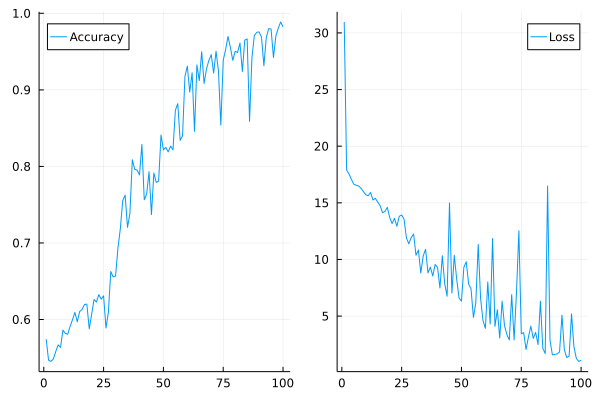

In [26]:
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

### Evaluate the model

In [27]:
acc = evaluate(model,metrics,x_test,y_test)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 98.0%


### Decision boundary

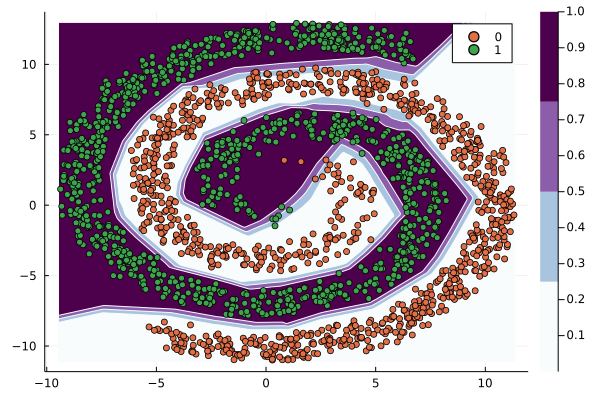

In [28]:
plot_decision_boundary(model,xData,yData)